# 

In [150]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')


In [152]:
# Load the dataset
df = pd.read_csv('gold_monthly_csv.csv')
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [197]:
df.describe()

,Price
count,847.000000
mean,416.556906
std,453.665313
min,34.490000
25%,35.190000
50%,319.622000
75%,447.029000
max,1840.807000


In [153]:
 # Display initial DataFrame to verify
print("Initial DataFrame:")
print(df.head())
print("\nColumns:", df.columns.tolist())

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m')  # Adjust format if needed

# Create 'month' column (e.g., '1950-01')
df['month'] = df['Date'].dt.strftime('%Y-%m')

# Drop 'Date' column
df.drop('Date', axis=1, inplace=True)

# Set 'month' as index and ensure it's a DatetimeIndex
df.set_index('month', inplace=True)
df.index = pd.to_datetime(df.index, format='%Y-%m')

# Display processed DataFrame to verify
print("\nProcessed DataFrame:")
print(df.head())
print("\nIndex type:", type(df.index))


Initial DataFrame:
      Date  Price
0  1950-01  34.73
1  1950-02  34.73
2  1950-03  34.73
3  1950-04  34.73
4  1950-05  34.73

Columns: ['Date', 'Price']

Processed DataFrame:
            Price
month            
1950-01-01  34.73
1950-02-01  34.73
1950-03-01  34.73
1950-04-01  34.73
1950-05-01  34.73

Index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>


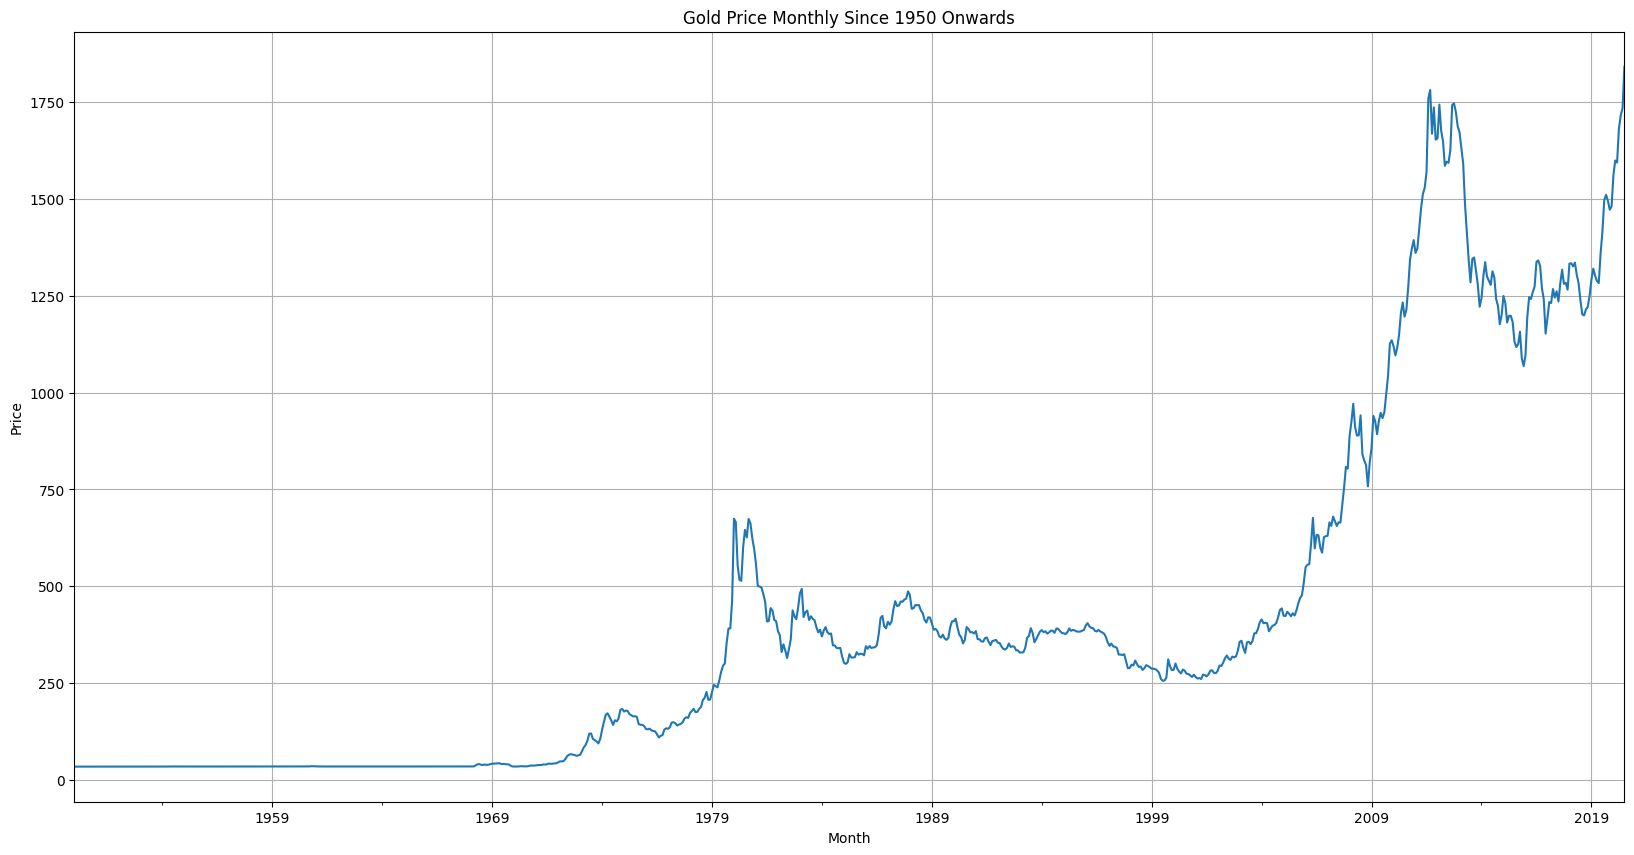

In [154]:
# Create line plot
plt.figure(figsize=(20, 10))
df['Price'].plot()  # Use 'Price' or adjust to your column name
plt.title("Gold Price Monthly Since 1950 Onwards")
plt.xlabel("Month")
plt.ylabel("Price")
plt.grid()
plt.show()

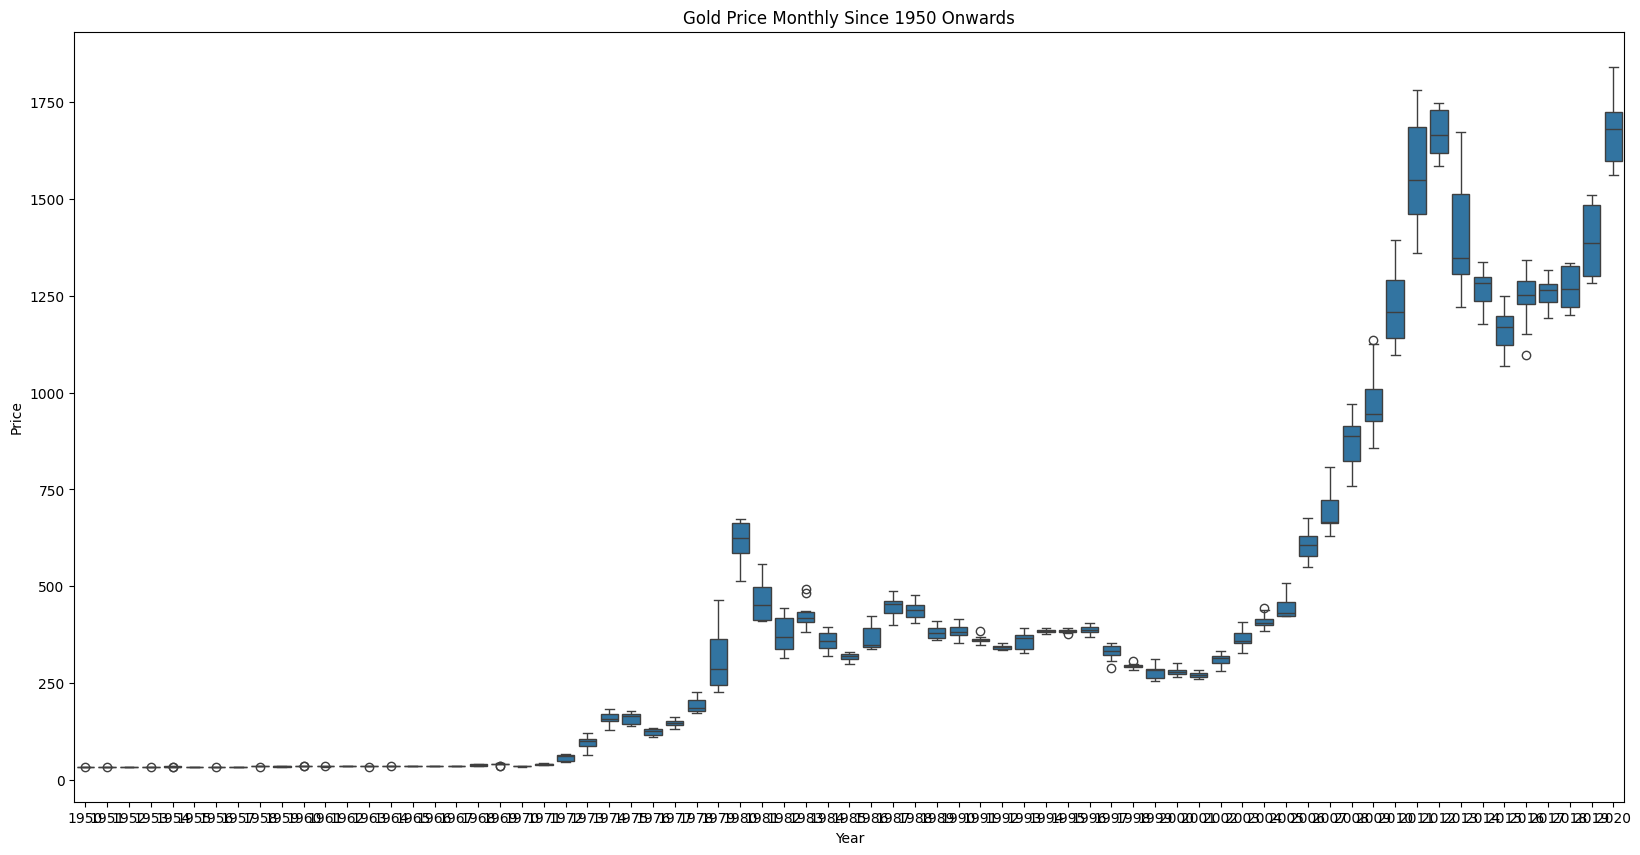

In [155]:
# Create boxplot
_, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(x=df.index.year, y=df['Price'], ax=ax)  # Use 'Price' or adjust to your column name
plt.title("Gold Price Monthly Since 1950 Onwards")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

In [156]:
# Create a date range for your data
date_range = pd.date_range(start='1950-01', end='2020-07', freq='M')

# Make sure we have the right number of dates
print(f"Number of dates: {len(date_range)}")
print(f"Number of data points: {len(df)}")

# If lengths match, set the date index
if len(date_range) == len(df):
    df.index = date_range
    df.index.name = 'Date'
else:
    # If not matching, create based on actual data length
    df.index = pd.date_range(start='1950-01', periods=len(df), freq='M')
    df.index.name = 'Date'

print("\nUpdated DataFrame:")
print(df.head())
print(f"\nIndex type: {type(df.index)}")


Number of dates: 846
Number of data points: 847

Updated DataFrame:
            Price
Date             
1950-01-31  34.73
1950-02-28  34.73
1950-03-31  34.73
1950-04-30  34.73
1950-05-31  34.73

Index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>


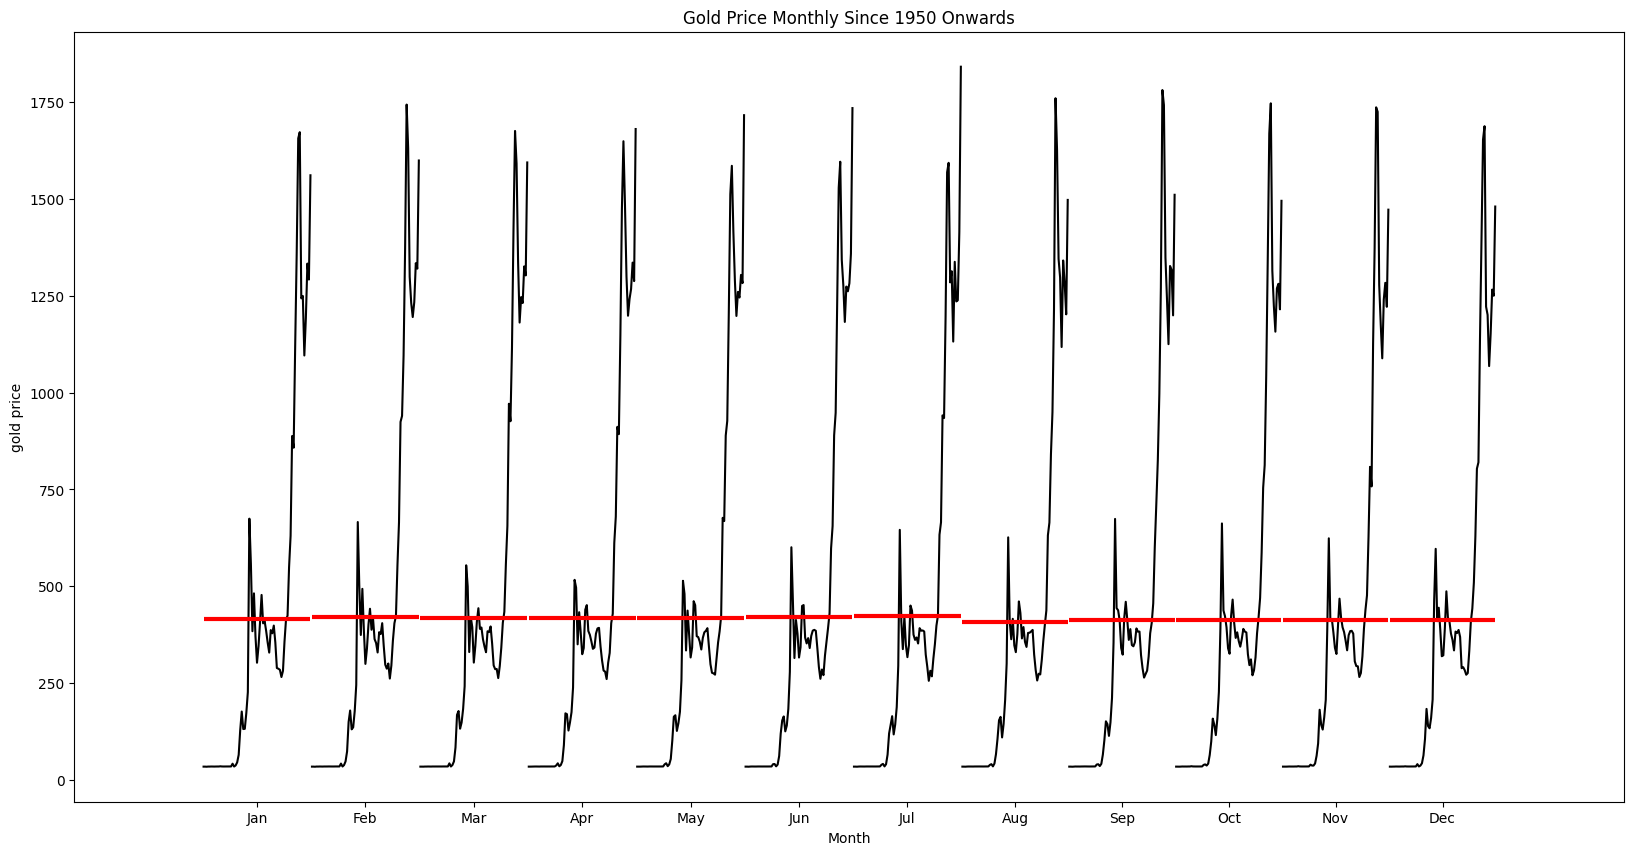

In [157]:
# Now create the month plot
from statsmodels.graphics.tsaplots import month_plot
fig, ax = plt.subplots(figsize=(20, 10))
month_plot(df['Price'], ylabel='gold price', ax=ax)
plt.title("Gold Price Monthly Since 1950 Onwards")
plt.xlabel("Month")
plt.show()

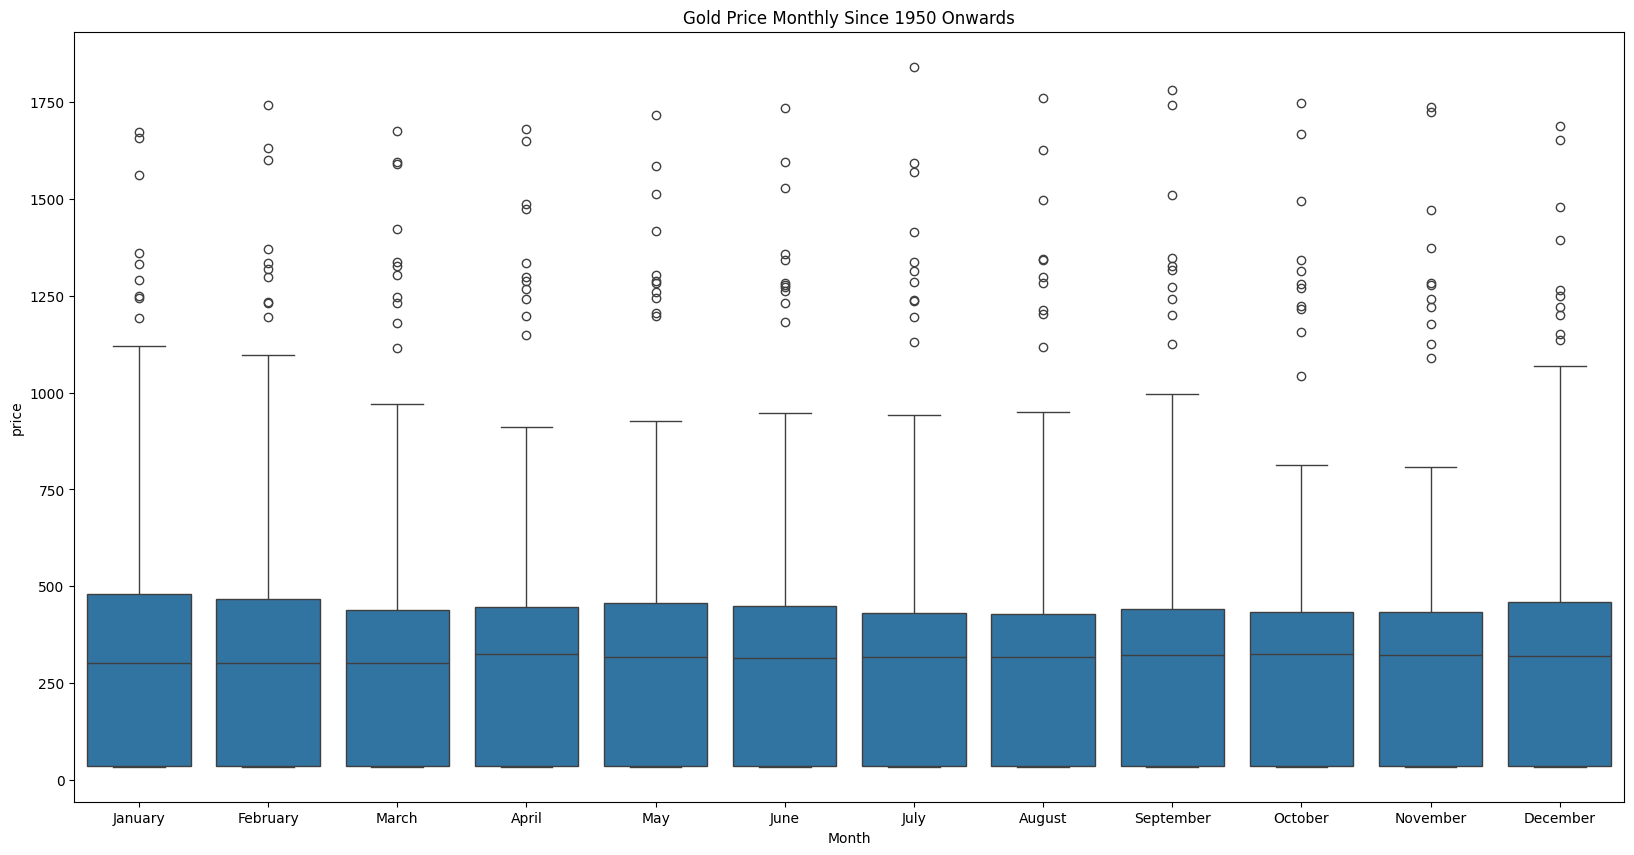

In [158]:
_, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(x= df.index.month_name(), y=df.values[:,0], ax = ax)
plt.title("Gold Price Monthly Since 1950 Onwards")
plt.xlabel("Month")
plt.ylabel("price")
plt.show();

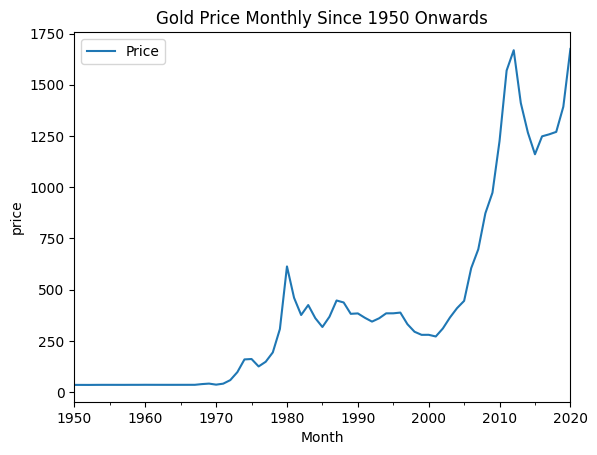

In [159]:
df_yearly_sum = df.resample('A').mean()
df_yearly_sum.plot();
plt.title("Gold Price Monthly Since 1950 Onwards")
plt.xlabel("Month")
plt.ylabel("price")
plt.show();

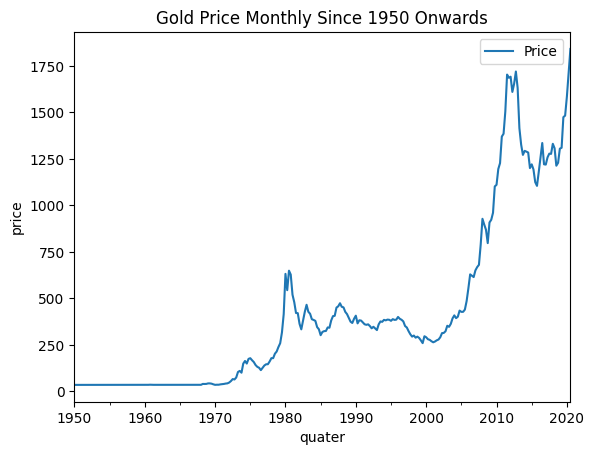

In [160]:
df_quaterly_sum = df.resample('Q').mean()
df_quaterly_sum.plot();
plt.title("Gold Price Monthly Since 1950 Onwards")
plt.xlabel("quater")
plt.ylabel("price")
plt.show();

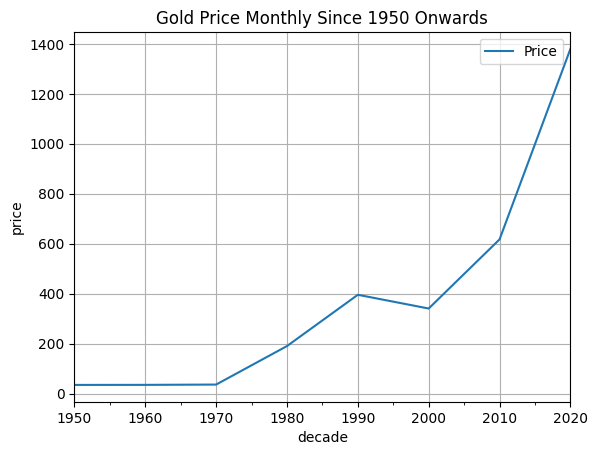

In [161]:
df_decade_sum = df.resample('10Y').mean()
df_decade_sum.plot();
plt.title("Gold Price Monthly Since 1950 Onwards")
plt.xlabel("decade")
plt.ylabel("price")
plt.grid();

In [162]:
df_1 =df.groupby(df.index.year).mean().rename(columns = {'Price': 'Mean'})
df_2 =df.groupby(df.index.year).std().rename(columns = {'Price':'Std'})
# Correct merge syntax - assign the result back to df_1
df_1 = df_1.merge(df_2, left_index=True, right_index=True)
df_1['Cov_pct']= ((df_1['Std']/df_1['Mean'])*100).round(2)
# Display the result
print("Merged DataFrame:")
print(df_1.head())

Merged DataFrame:
           Mean       Std  Cov_pct
Date                              
1950  34.729167  0.002887     0.01
1951  34.717500  0.020057     0.06
1952  34.628333  0.117538     0.34
1953  34.879167  0.056481     0.16
1954  35.020000  0.082792     0.24


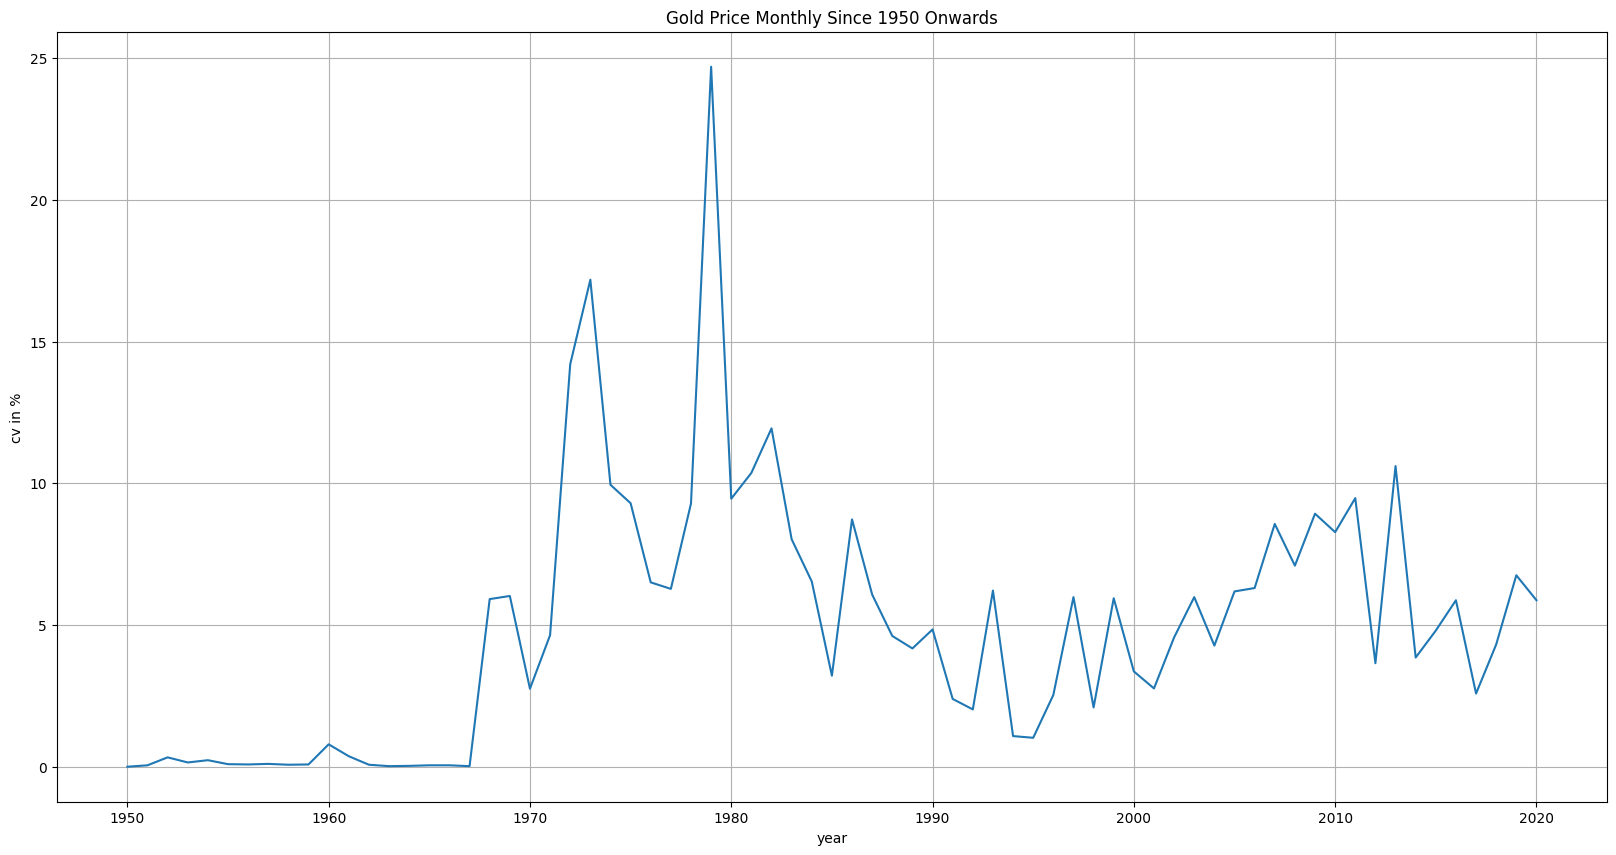

In [163]:
fig, ax = plt.subplots(figsize=(20, 10))
df_1['Cov_pct'].plot();
plt.title("Gold Price Monthly Since 1950 Onwards")
plt.xlabel("year")
plt.ylabel("cv in %")
plt.grid()

In [164]:
train = df[df.index.year <= 2015]
test = df[df.index.year >2015]


In [165]:
print(train.shape)

(792, 1)


In [166]:
print(test.shape)

(55, 1)


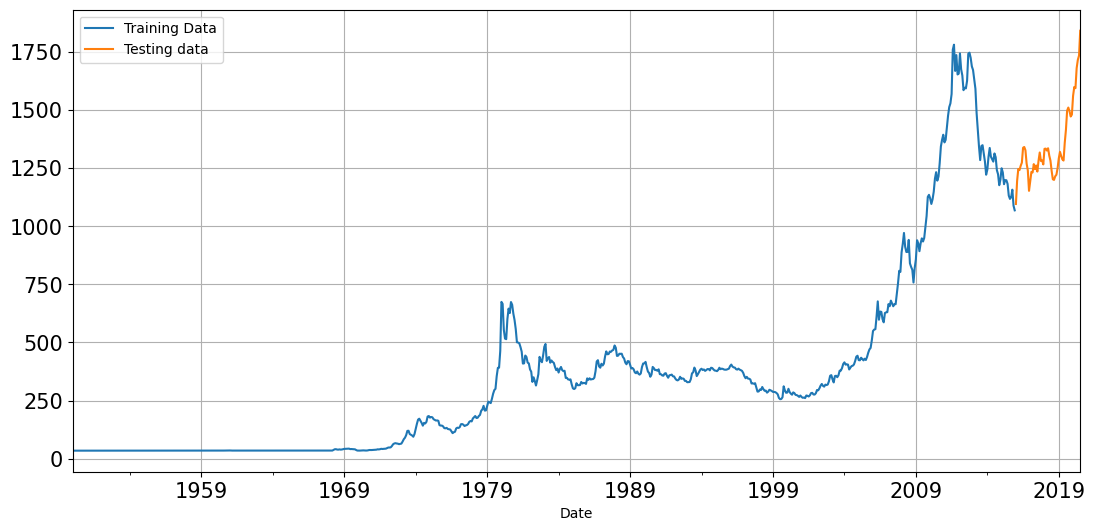

In [167]:
train["Price"].plot(figsize=(13,6),fontsize = 15)
test["Price"].plot(figsize=(13,6),fontsize = 15)
plt.grid()
plt.legend(['Training Data','Testing data'])
plt.show()

In [179]:
train_time = [ i+1 for i in range(len(train))]
test_time = [ i+len(train)+1 for i in range(len(test))]
len(train_time),len(test_time)



(792, 55)

In [180]:
LR_train = train.copy()
LR_test = test.copy()

In [181]:
LR_train['time'] = train_time
LR_test['time'] = test_time


In [182]:
lr= LinearRegression()
lr.fit(LR_train[['time']],LR_train["Price"].values)

LinearRegression()

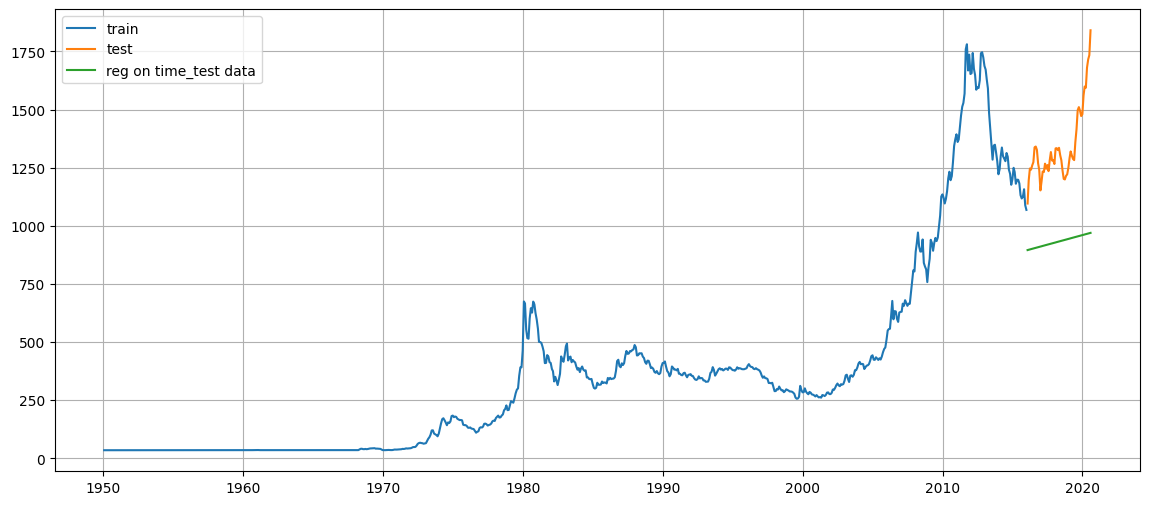

In [183]:
test_predictions_model1 =lr.predict(LR_test[["time"]])
LR_test['forecast']=test_predictions_model1
plt.figure(figsize=(14,6))
plt.plot(train['Price'],label='train')
plt.plot(test['Price'],label='test')
plt.plot(LR_test['forecast'],label = 'reg on time_test data')
plt.legend(loc = 'best')
plt.grid();

In [184]:
def mape(actual,pred):
    return round((np.mean(abs(actual - pred)/actual))*100,2)
    

In [185]:
mape_model1_test = mape(test['Price'].values,test_prediction_model1)
print("MAPE is %3.3f"%(mape_model1_test),"%")


MAPE is 111.630 %


In [186]:
results = pd.DataFrame({'Test Mape (%) ' : [mape_model1_test]}, index =["RegressionOnTime"])
results

,Test Mape (%)
RegressionOnTime,111.63


In [187]:
Naive_train = train.copy()
Naive_test = test.copy()

In [188]:
Naive_test['naive'] = np.asarray(train['Price'])[len(np.asarray(train['Price'])) -1]
Naive_test['naive'].head()

Date
2016-01-31    1068.317
2016-02-29    1068.317
2016-03-31    1068.317
2016-04-30    1068.317
2016-05-31    1068.317
Freq: ME, Name: naive, dtype: float64

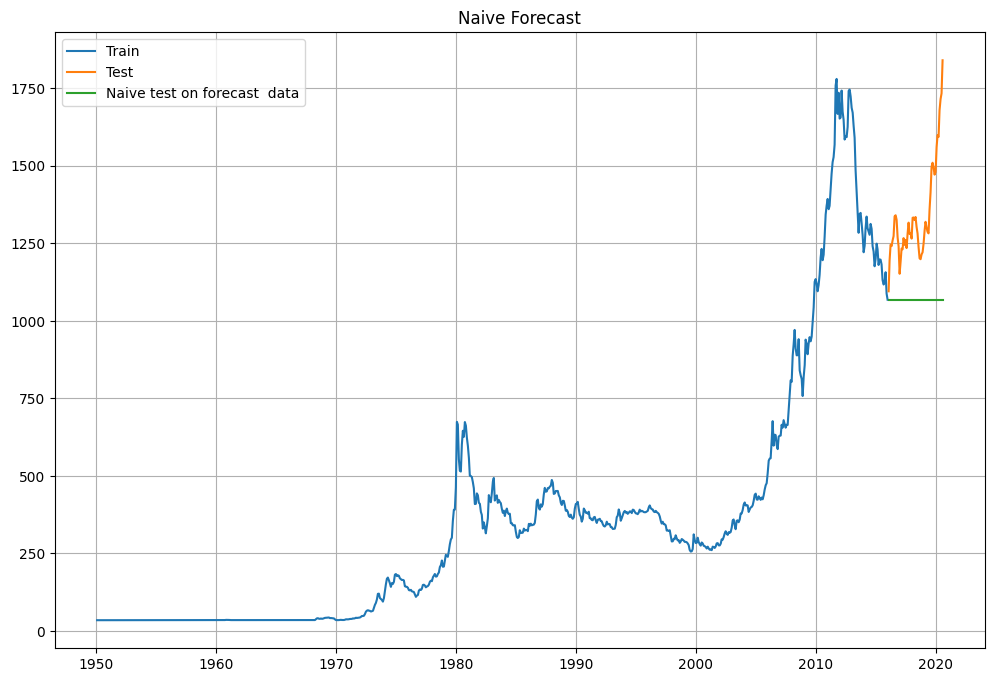

In [189]:
plt.figure(figsize=(12,8))
plt.plot(Naive_train["Price"],label='Train')
plt.plot(test["Price"],label='Test')
plt.plot(Naive_test['naive'],label = 'Naive test on forecast  data')
plt.legend(loc = 'best')
plt.title("Naive Forecast")
plt.grid();

In [190]:
mape_model2_test = mape(test['Price'].values,Naive_test['naive'].values)
print("MAPE is %3.3f"%(mape_model2_test),"%")


MAPE is 19.380 %


In [191]:
resultsDF_2 = pd.DataFrame({'Test MAPE (%) ' : [mape_model2_test]}, index =["NaiveModel"])
results = pd.concat([results,resultsDF_2])
results

,Test Mape (%),Test MAPE (%)
RegressionOnTime,111.63,NaN
NaiveModel,NaN,19.38


In [192]:
final_model = ExponentialSmoothing(df,
                                   trend = 'additive',
                                   seasonal = 'additive').fit(smoothing_level = 0.4,
                                                              smoothing_trend = 0.3,
                                                              smoothing_seasonal= 0.6)
                                   

In [193]:
Mape_final_model = mape(df['Price'].values, final_model.fittedvalues)
print("MAPE:", Mape_final_model)

MAPE: 17.24


In [194]:
prediction =final_model.forecast(steps = len(test)) 

In [195]:
pred_df = pd.DataFrame({'lower_CI': prediction - 1.96*np.std(final_model.resid,ddof = 1),
                        'prediction' : prediction,
                        'upper_CI' : prediction + 1.96*np.std(final_model.resid,ddof =1)})
pred_df.head()                        

,lower_CI,prediction,upper_CI
2020-08-31,1684.720065,1792.871037,1901.022009
2020-09-30,1615.306077,1723.457050,1831.608022
2020-10-31,1538.567922,1646.718895,1754.869867
2020-11-30,1476.758600,1584.909572,1693.060545
2020-12-31,1459.327290,1567.478262,1675.629235


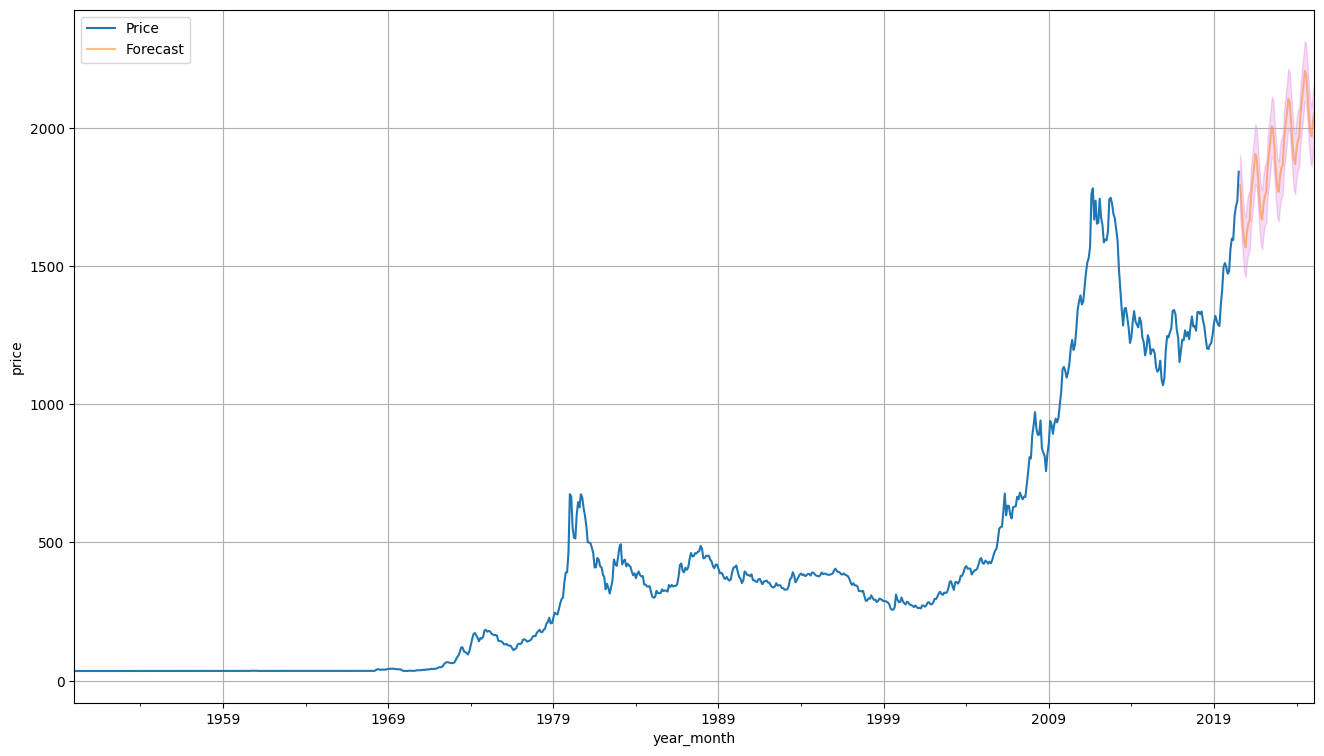

In [196]:
axis = df.plot(label = 'Actual', figsize=(16,9))
pred_df['prediction'].plot(ax= axis, label = 'Forecast', alpha=0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_CI'],color='m',alpha=.15)
axis.set_xlabel('year_month')
axis.set_ylabel('price')
plt.legend(loc = 'best')
plt.grid()
plt.show()